In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df.shape

(11430, 89)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
#Encoding 'status' as label 1 & 0 , naming the field as target
df['target'] = pd.get_dummies(df['status'])['legitimate'].astype('int')
df.drop('status',axis = 1, inplace=True)
df.drop('url',axis=1,inplace =True)
df[['target']].head(5)

,target
0,1
1,0
2,0
3,1
4,1


In [ ]:
tmp = df.isnull().sum().reset_index(name='missing_val')
tmp[tmp['missing_val']!= 0]

,index,missing_val


In [ ]:
likely_cat = {}
for var in df.iloc[:,1:].columns:
    likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.002

num_cols = []
cat_cols = []
for col in likely_cat.keys():
    if (likely_cat[col] == False):
        num_cols.append(col)
    else:
        cat_cols.append(col)

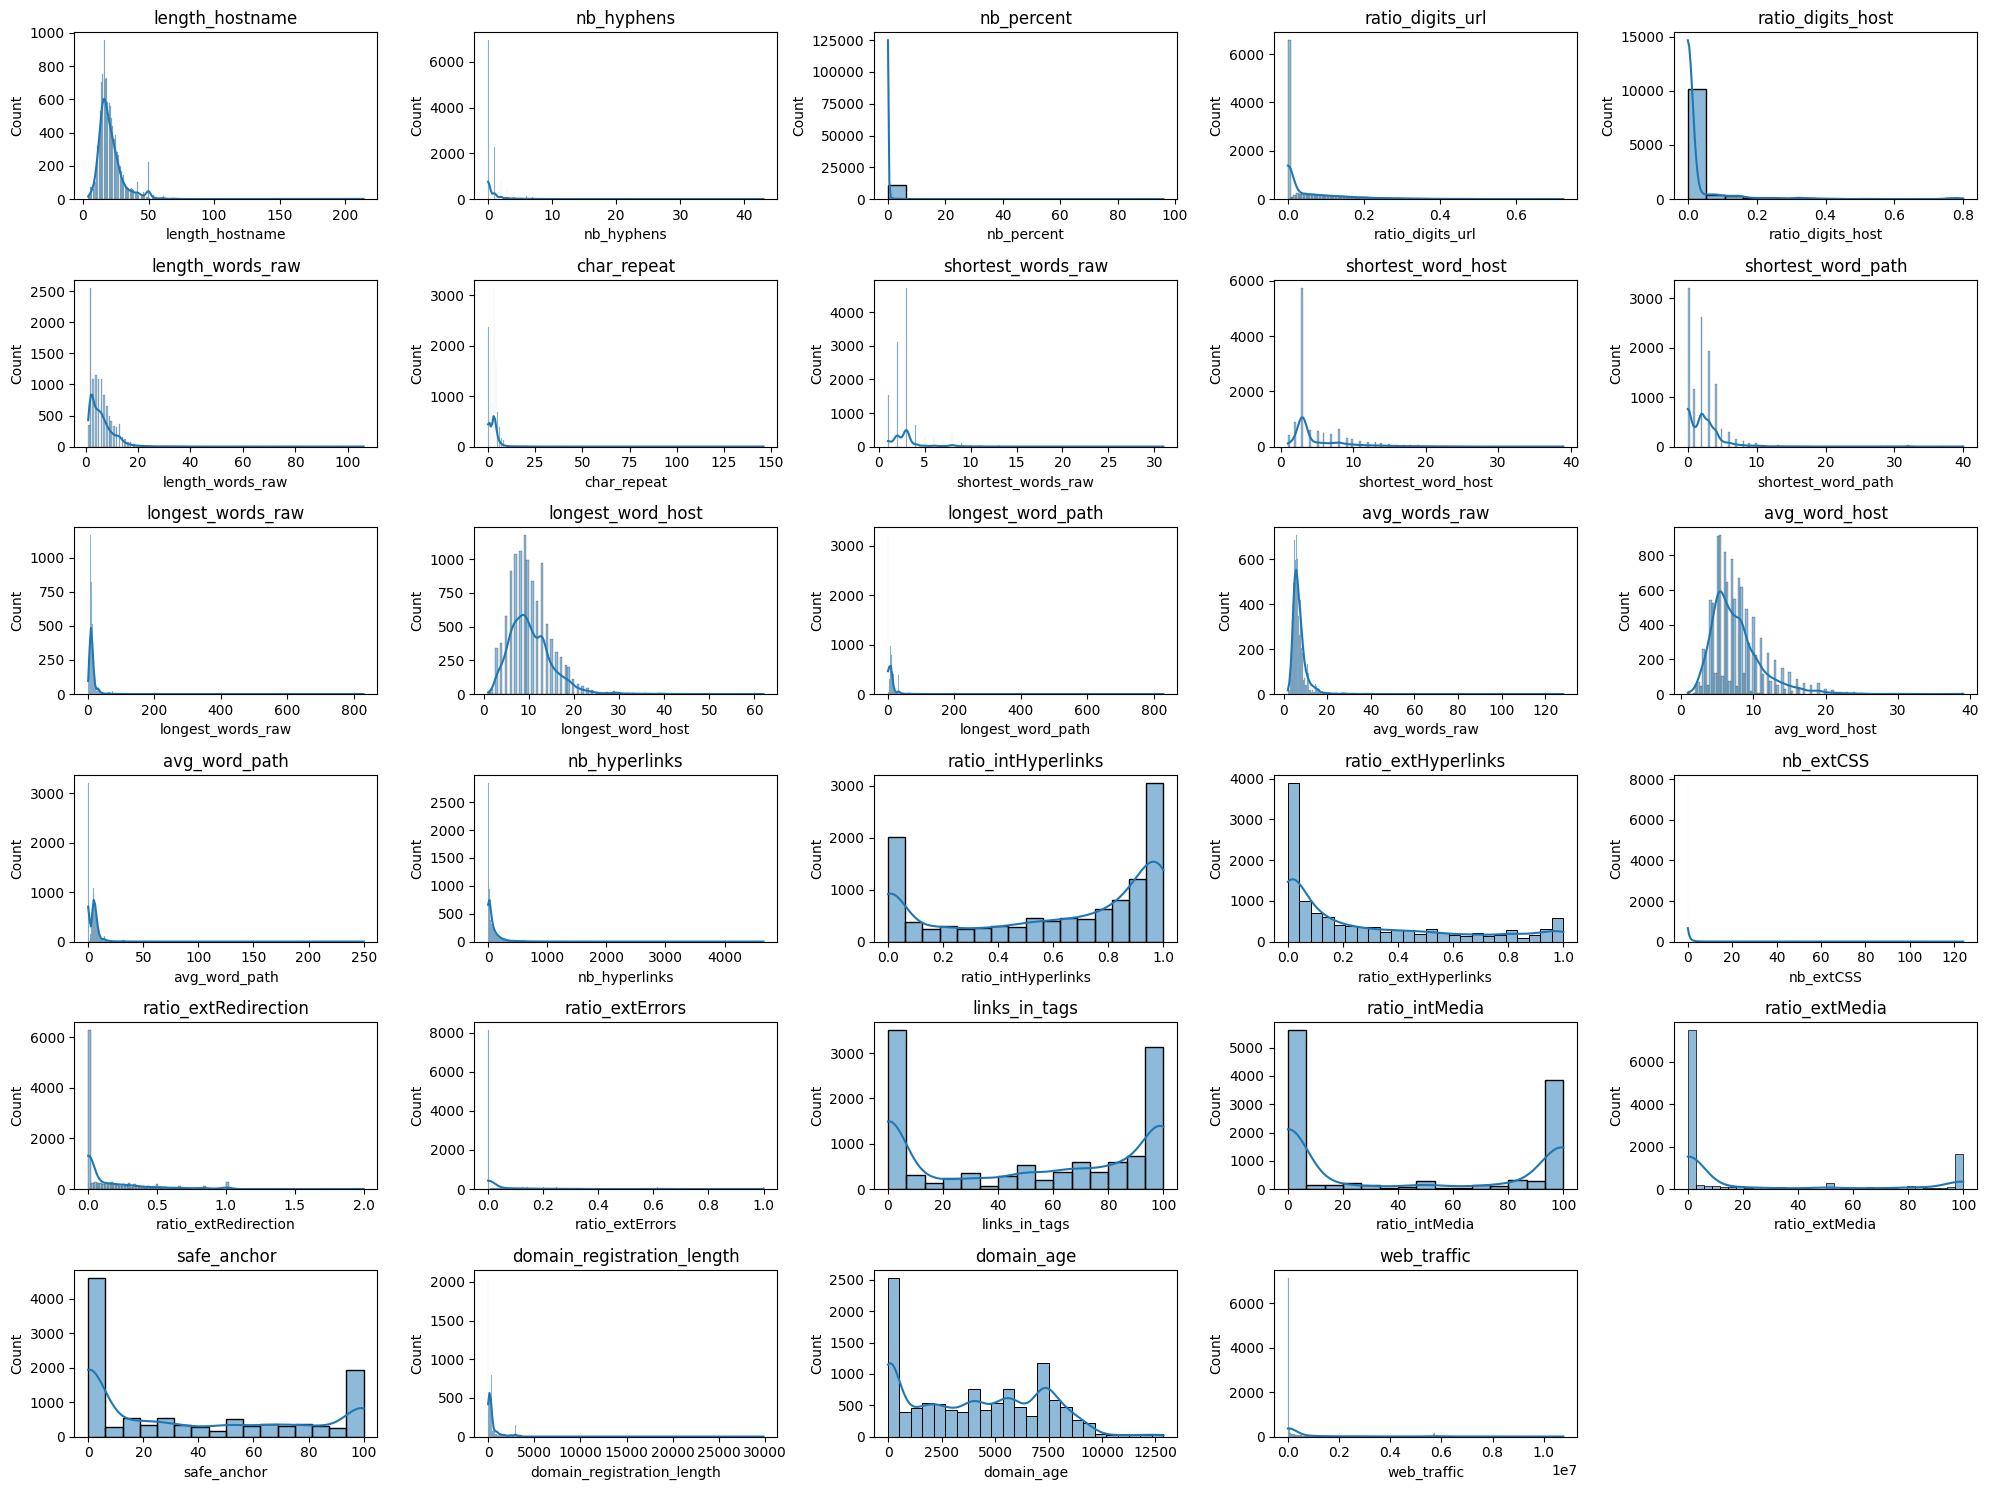

In [ ]:
# prompt: data visualization before feature scaling in a single graph

plt.figure(figsize=(20, 15)) # Increased figure size
for i, col in enumerate(num_cols):
    plt.subplot(6, 5, i + 1) # Increased subplot grid size (e.g., 6 rows, 5 columns)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

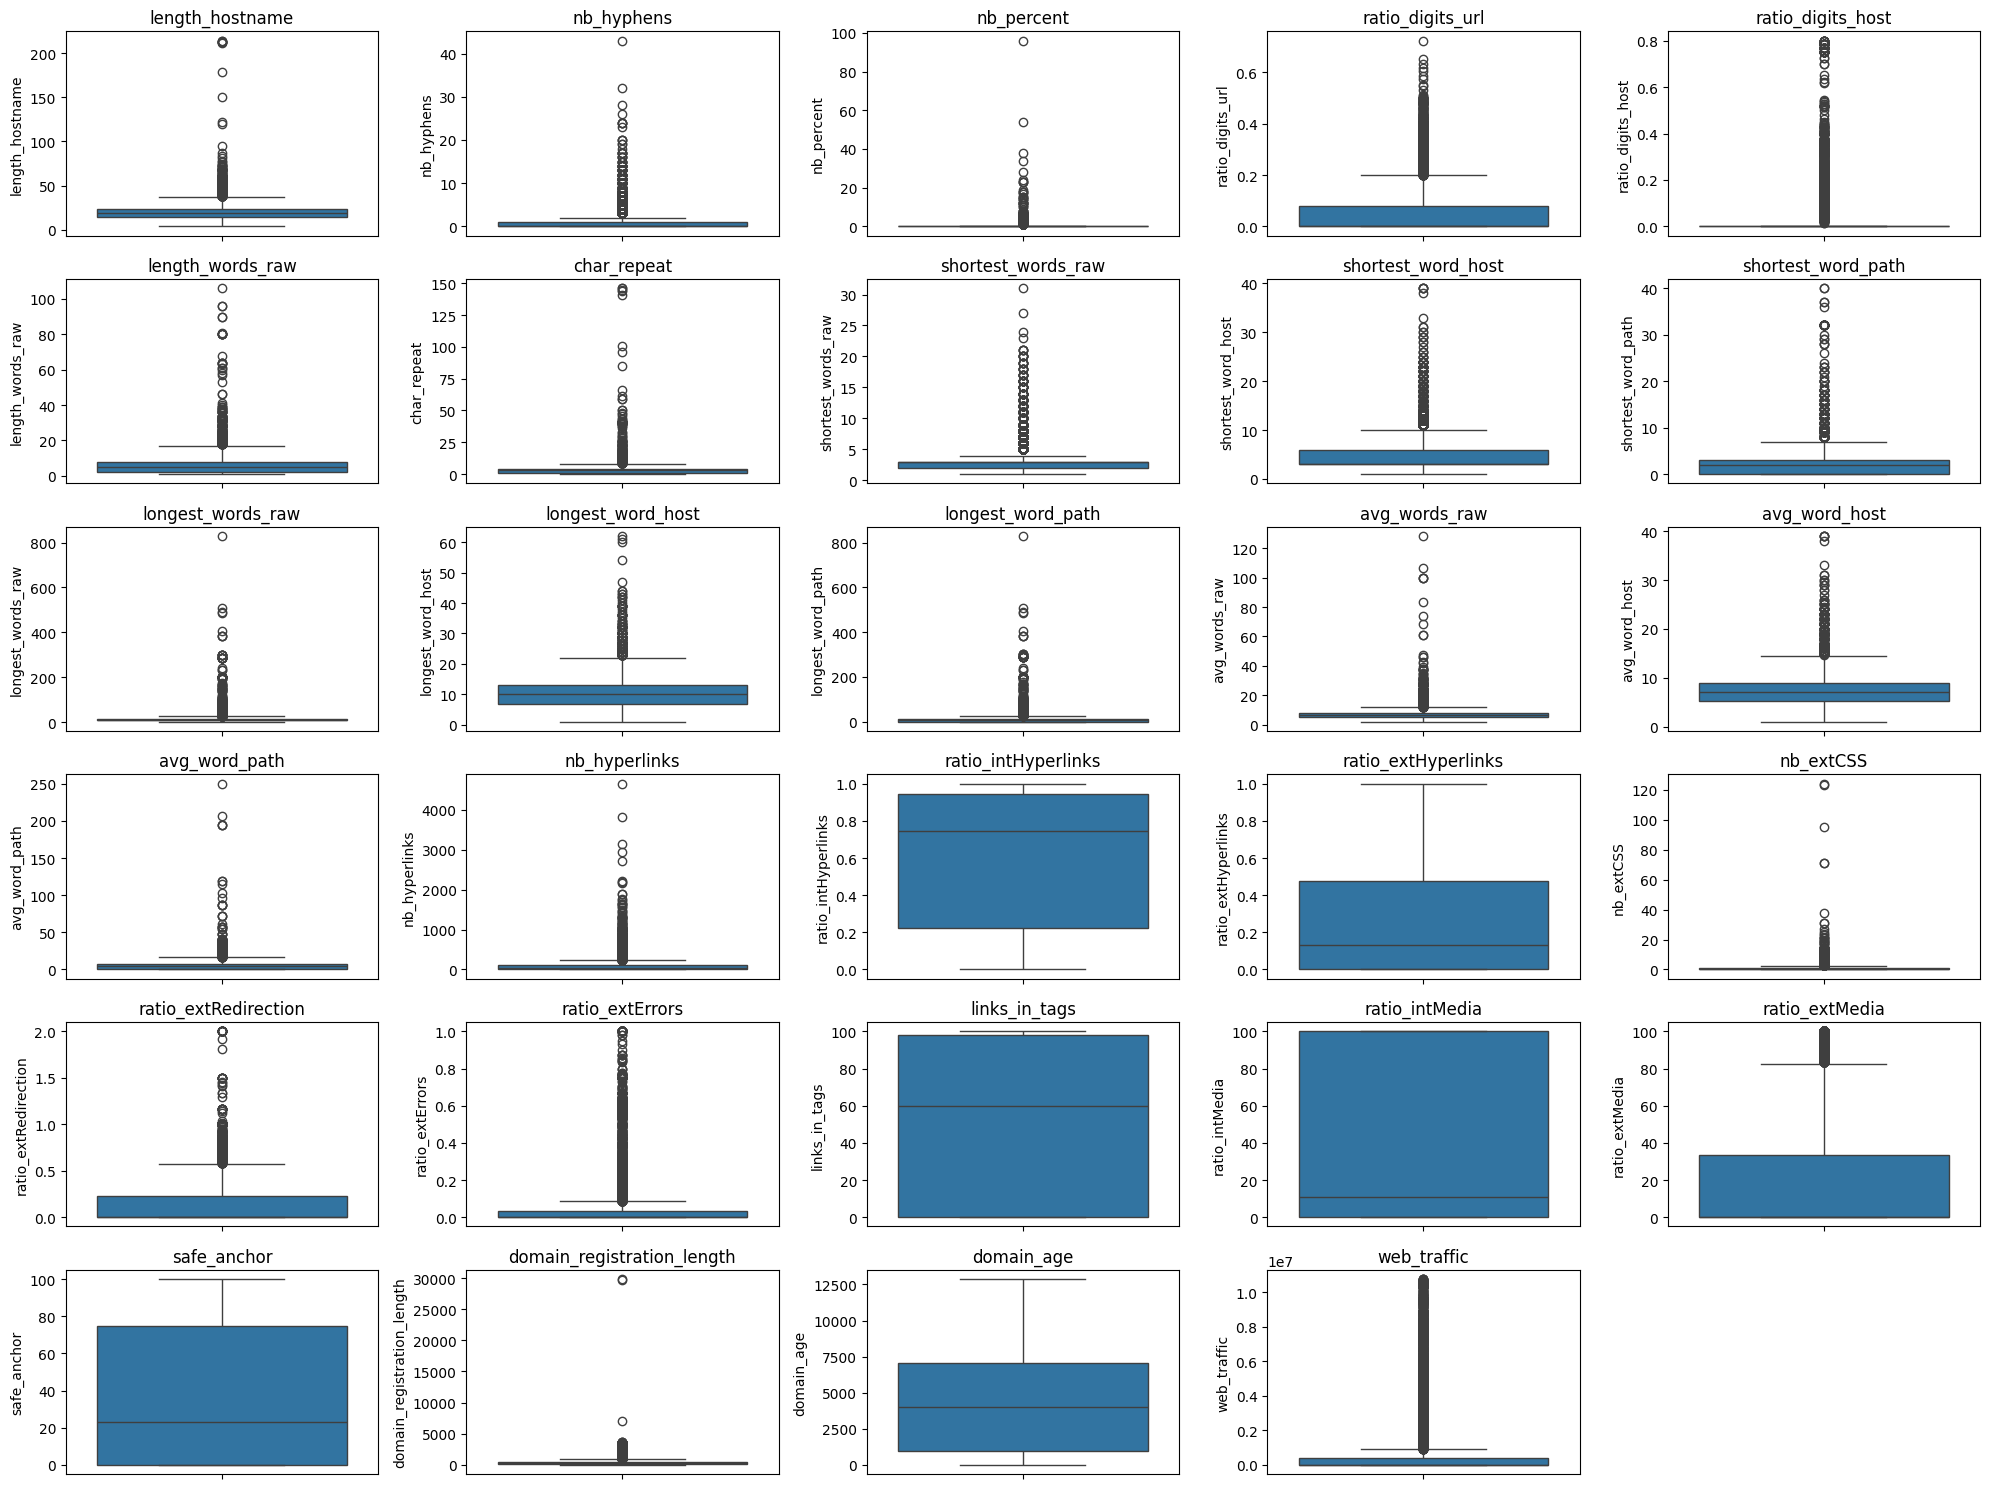

In [ ]:
# prompt: boxplot on data before scaling

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

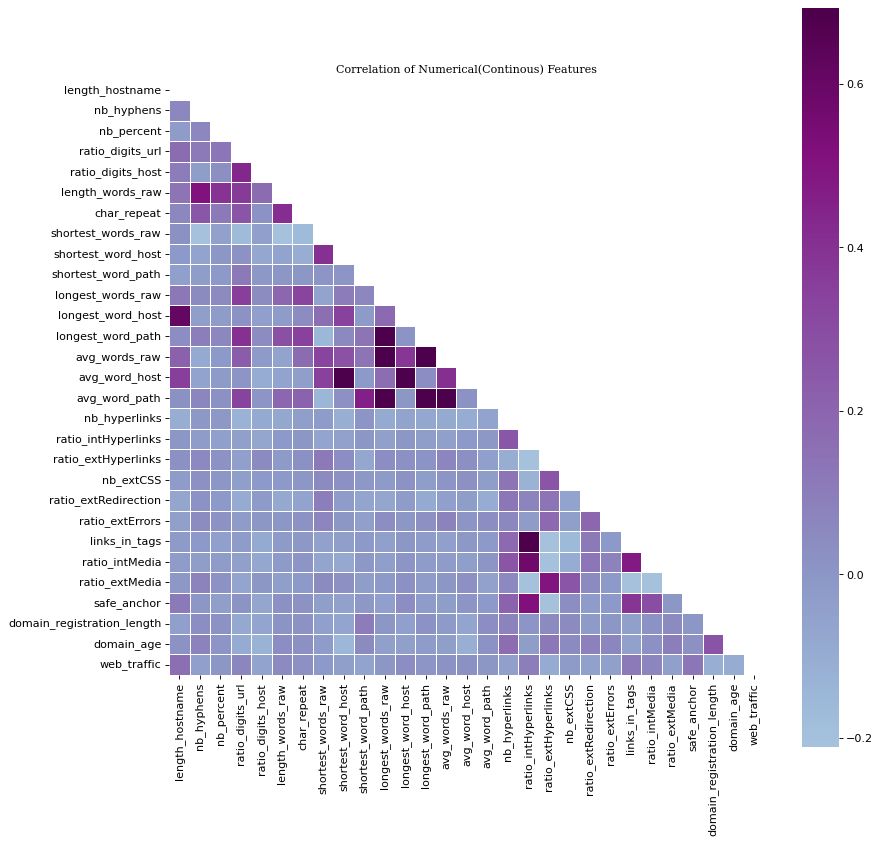

In [ ]:
#Taking all columns except URL
corr = df[num_cols].corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

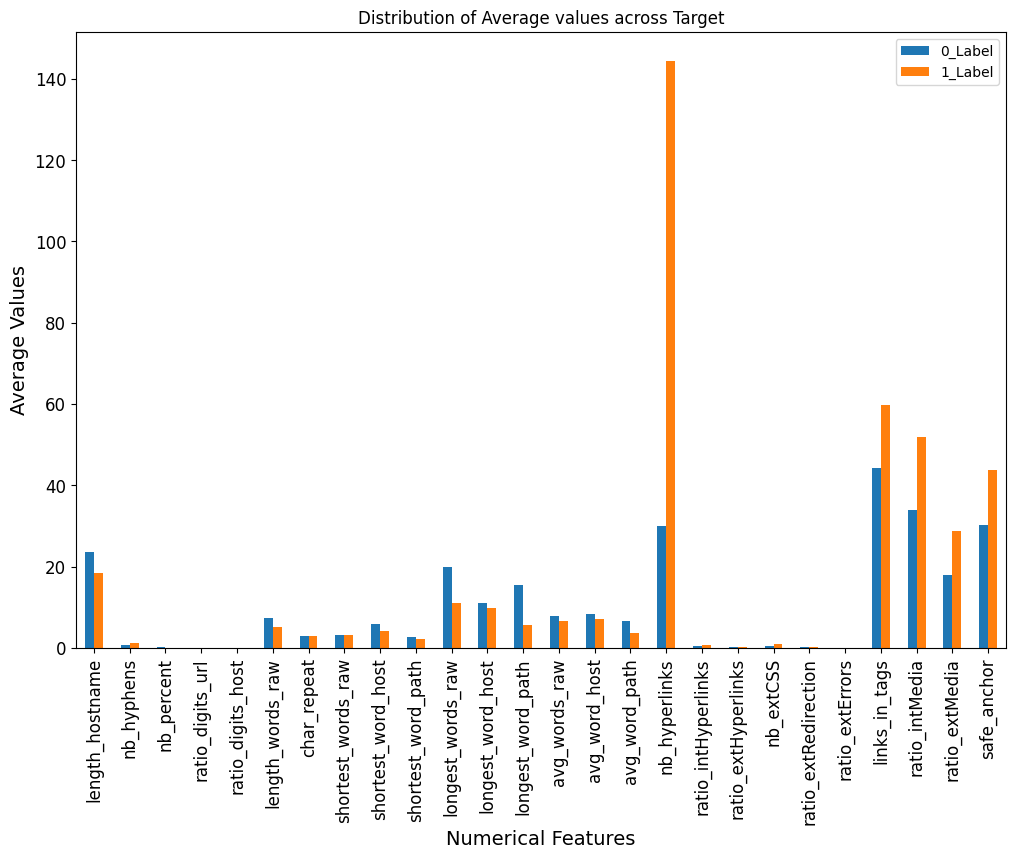

In [ ]:
df_distr =df.groupby('target')[num_cols].mean().reset_index().T
df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

#plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#ax.set_ylim(0,500000)
plt.show()

In [ ]:
# prompt: split into training and testing

from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred_lr = LR.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Log", classification_report(y_test, y_pred_lr))
print("knn", classification_report(y_test, y_pred_knn))
print("dt", classification_report(y_test, y_pred_dt))
print("rf", classification_report(y_test, y_pred_rf))
print("svm", classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1129
           1       0.79      0.80      0.80      1157

    accuracy                           0.79      2286
   macro avg       0.79      0.79      0.79      2286
weighted avg       0.79      0.79      0.79      2286

knn               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1129
           1       0.85      0.82      0.84      1157

    accuracy                           0.84      2286
   macro avg       0.84      0.84      0.84      2286
weighted avg       0.84      0.84      0.84      2286

dt               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1129
           1       0.94      0.93      0.93      1157

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

rf      

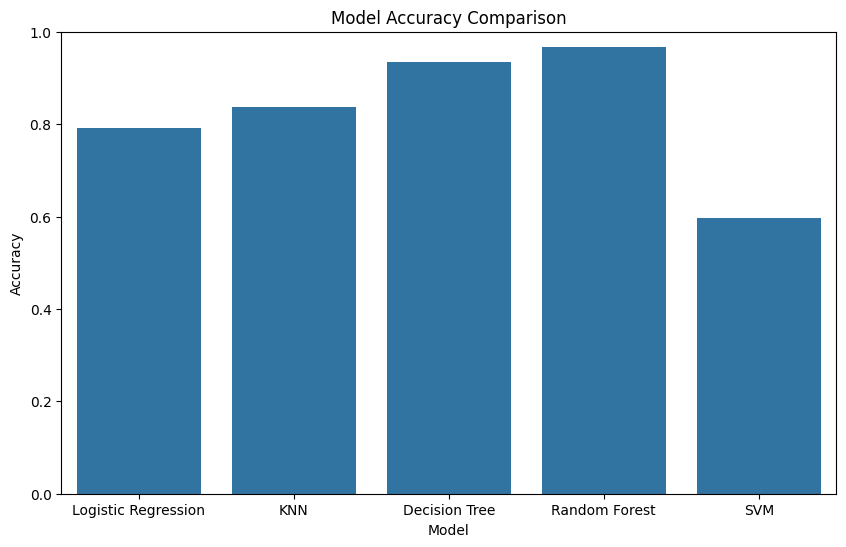

In [ ]:
# prompt: plot result graph without scalling

results = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'],
                        'Accuracy': [accuracy_score(y_test, y_pred_lr),
                                     accuracy_score(y_test, y_pred_knn),
                                     accuracy_score(y_test, y_pred_dt),
                                     accuracy_score(y_test, y_pred_rf),
                                     accuracy_score(y_test, y_pred_svm)]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for accuracy
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize scalers
scaler_standard = StandardScaler()

# Apply Standard Scaling to numerical features
X_train_num_standard = scaler_standard.fit_transform(X_train[num_cols])
X_test_num_standard = scaler_standard.transform(X_test[num_cols])


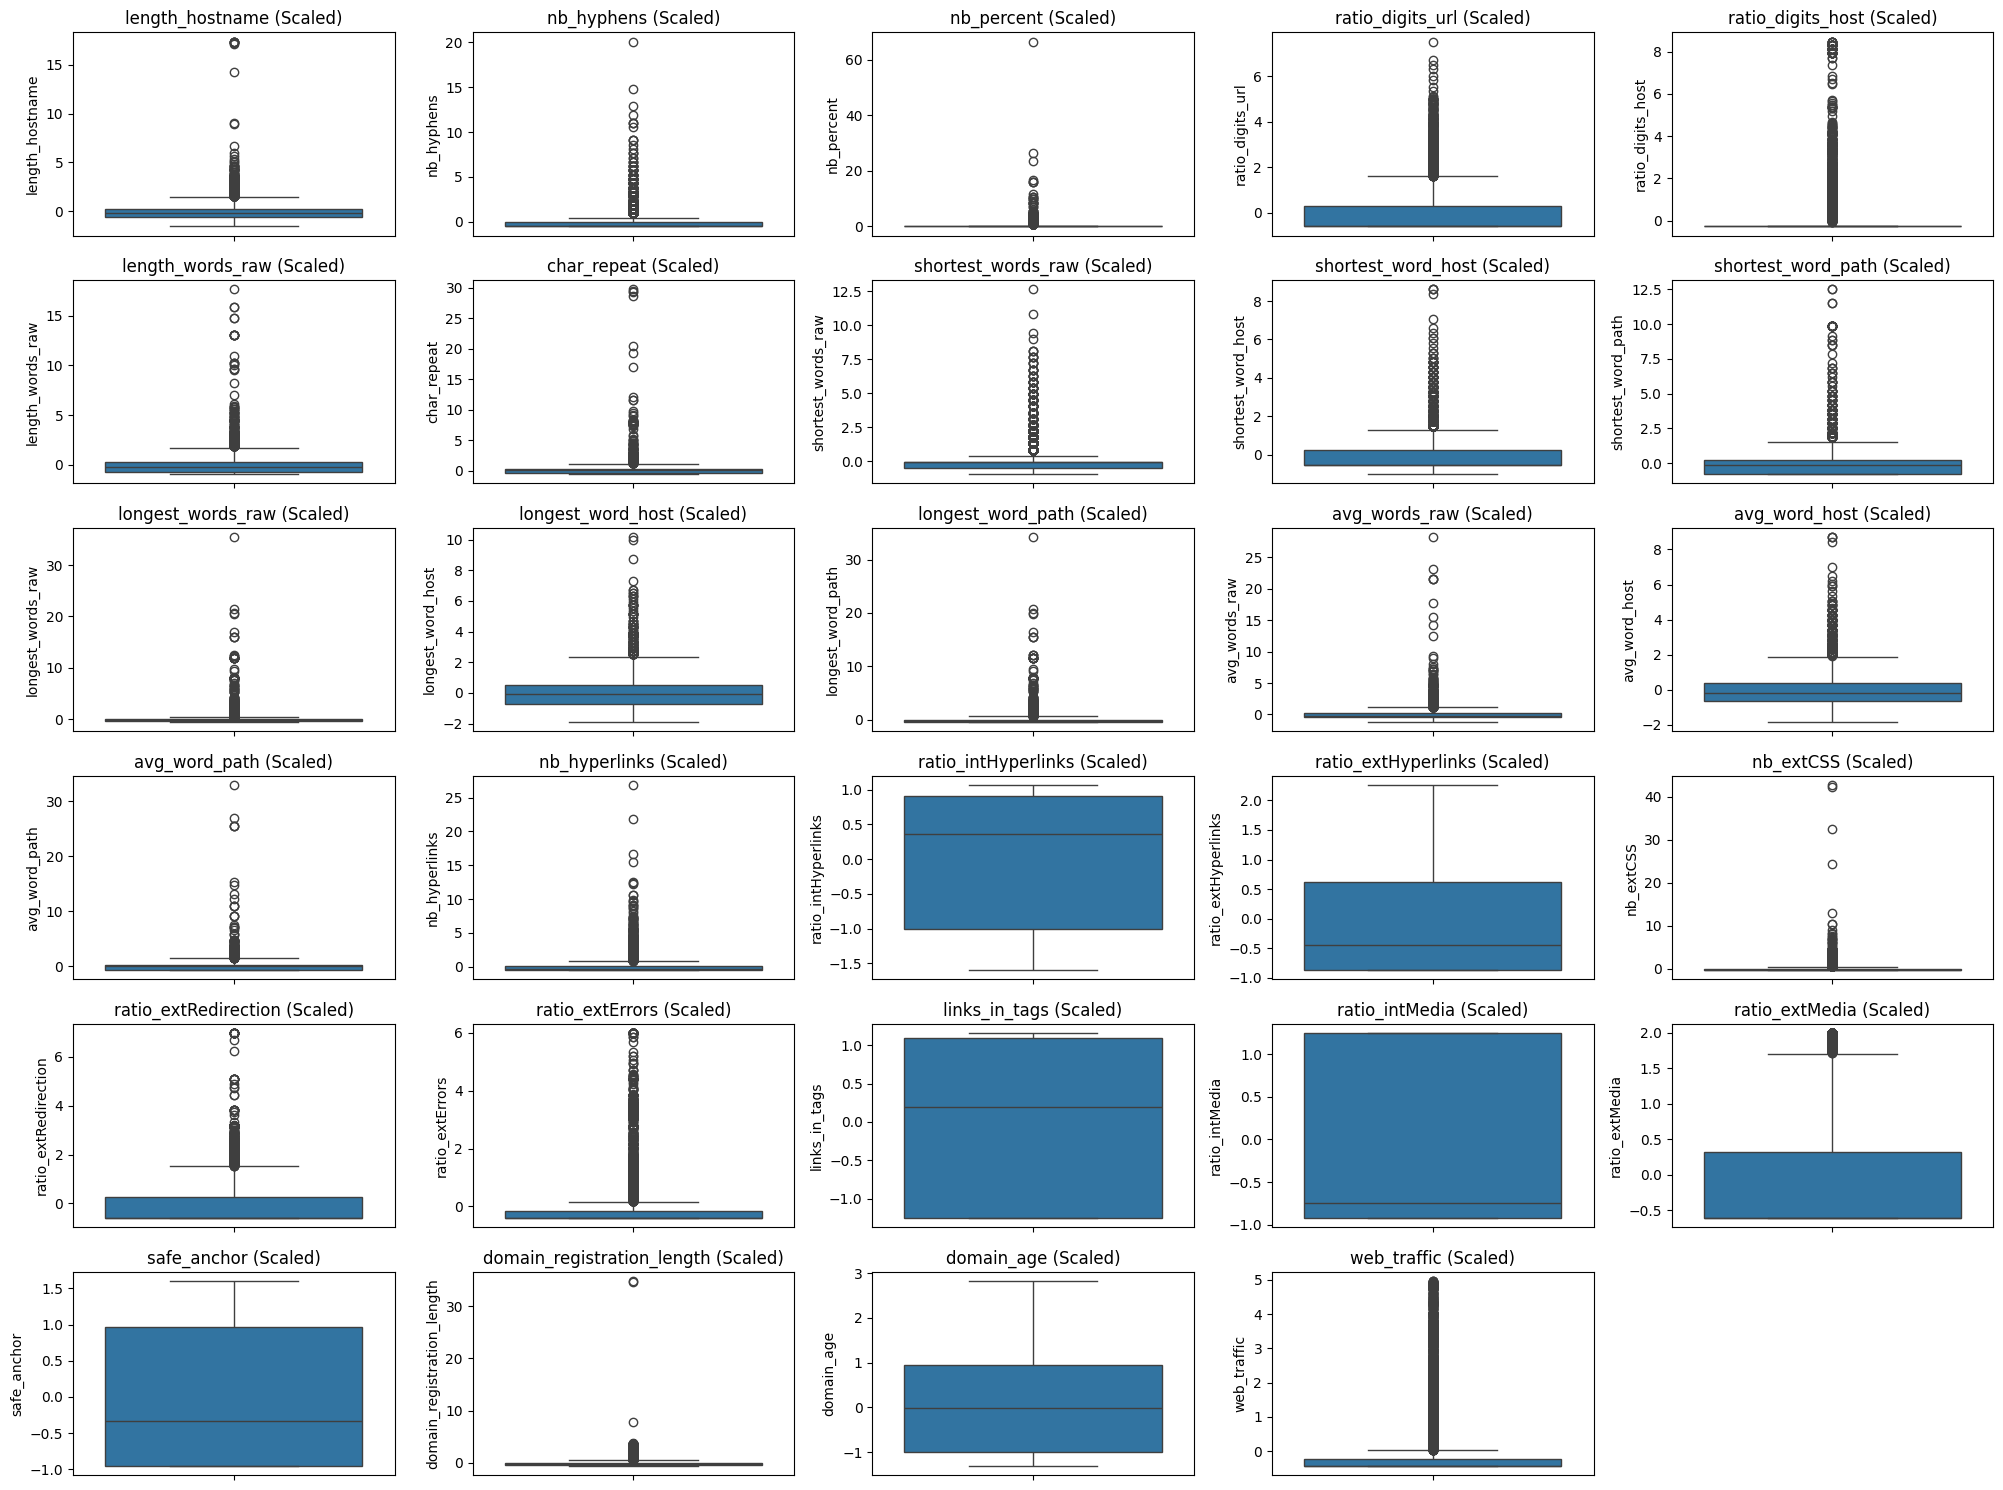

In [ ]:
# Combine scaled numerical features with categorical features (if any)
# Assuming cat_cols are one-hot encoded or handled separately
# For this example, we will just use the scaled numerical data for boxplotting
X_train_scaled_df = pd.DataFrame(X_train_num_standard, columns=num_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_num_standard, columns=num_cols, index=X_test.index)

# Boxplot of scaled numerical data
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(y=X_train_scaled_df[col])
    plt.title(f'{col} (Scaled)')
plt.tight_layout()
plt.show()

In [ ]:
cat_cols_for_concat = [col for col in cat_cols if col != 'target']
X_train_scaled_standard = pd.concat([pd.DataFrame(X_train_num_standard, columns=num_cols), X_train[cat_cols_for_concat].reset_index(drop=True)], axis=1)
X_test_scaled_standard = pd.concat([pd.DataFrame(X_test_num_standard, columns=num_cols), X_test[cat_cols_for_concat].reset_index(drop=True)], axis=1)


In [ ]:
# training Logistic Regression with Standard Scaled data:
LR_scaled_standard = LogisticRegression()
LR_scaled_standard.fit(X_train_scaled_standard, y_train)
y_pred_lr_scaled_standard = LR_scaled_standard.predict(X_test_scaled_standard)
print("\nLogistic Regression with Standard Scaling:")
print(classification_report(y_test, y_pred_lr_scaled_standard))

# Train KNN, Decision Tree, Random Forest, and SVM with Standard Scaled data
knn_scaled_standard = KNeighborsClassifier(n_neighbors=3) # You can tune n_neighbors
knn_scaled_standard.fit(X_train_scaled_standard, y_train)
y_pred_knn_scaled_standard = knn_scaled_standard.predict(X_test_scaled_standard)
print("\nKNN with Standard Scaling:")
print(classification_report(y_test, y_pred_knn_scaled_standard))

# Note: Decision Tree and Random Forest are not sensitive to scaling
dt_scaled_standard = DecisionTreeClassifier()
dt_scaled_standard.fit(X_train_scaled_standard, y_train)
y_pred_dt_scaled_standard = dt_scaled_standard.predict(X_test_scaled_standard)
print("\nDecision Tree with Standard Scaling:")
print(classification_report(y_test, y_pred_dt_scaled_standard))

rf_scaled_standard = RandomForestClassifier()
rf_scaled_standard.fit(X_train_scaled_standard, y_train)
y_pred_rf_scaled_standard = rf_scaled_standard.predict(X_test_scaled_standard)
print("\nRandom Forest with Standard Scaling:")
print(classification_report(y_test, y_pred_rf_scaled_standard))

svm_scaled_standard = SVC()
svm_scaled_standard.fit(X_train_scaled_standard, y_train)
y_pred_svm_scaled_standard = svm_scaled_standard.predict(X_test_scaled_standard)
print("\nSVM with Standard Scaling:")
print(classification_report(y_test, y_pred_svm_scaled_standard))


Logistic Regression with Standard Scaling:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1129
           1       0.95      0.96      0.96      1157

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286


KNN with Standard Scaling:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1129
           1       0.94      0.97      0.96      1157

    accuracy                           0.95      2286
   macro avg       0.96      0.95      0.95      2286
weighted avg       0.96      0.95      0.95      2286


Decision Tree with Standard Scaling:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1129
           1       0.93      0.93      0.93      1157

    accuracy                           0.93      2286
   macro avg      

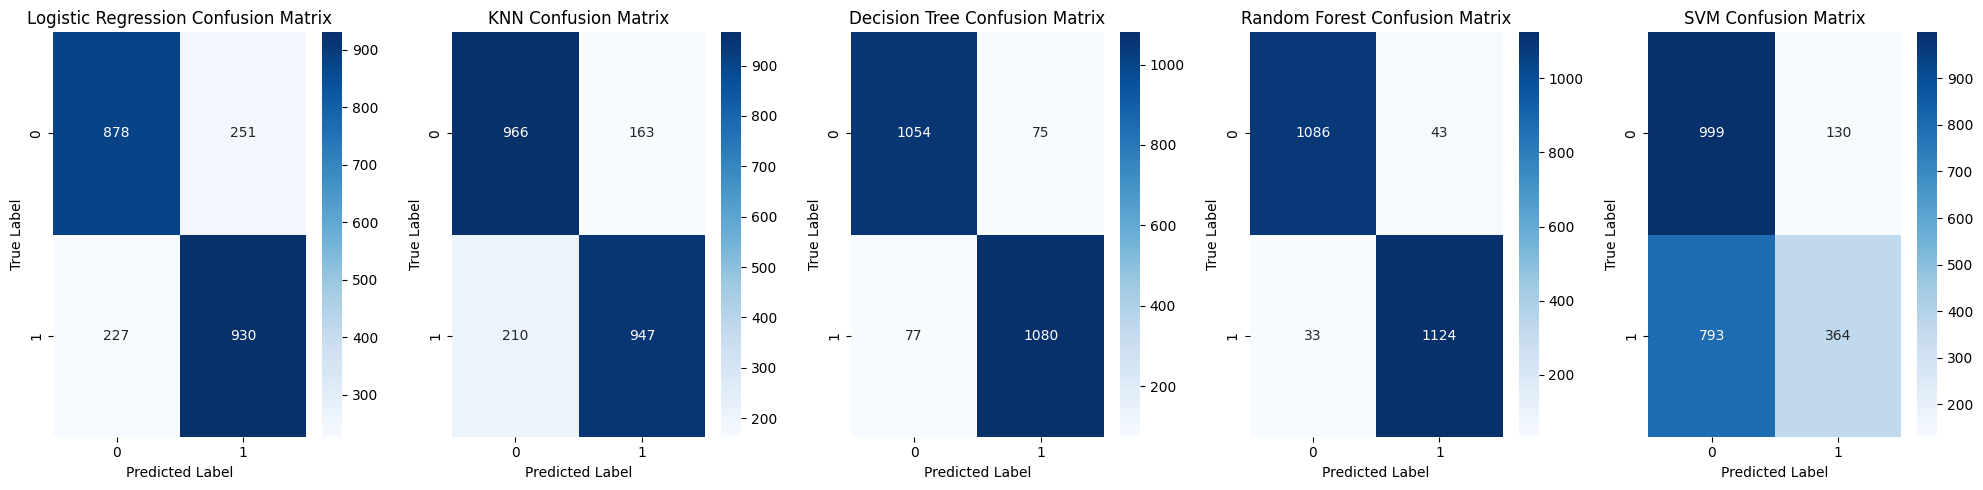

In [ ]:
# Calculate confusion matrices for each model
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create a list of confusion matrices and model names
confusion_matrices = [cm_lr, cm_knn, cm_dt, cm_rf, cm_svm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']

# Plot all confusion matrices in a single figure
fig, axes = plt.subplots(nrows=1, ncols=len(confusion_matrices), figsize=(20, 5))

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_names[i]} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()


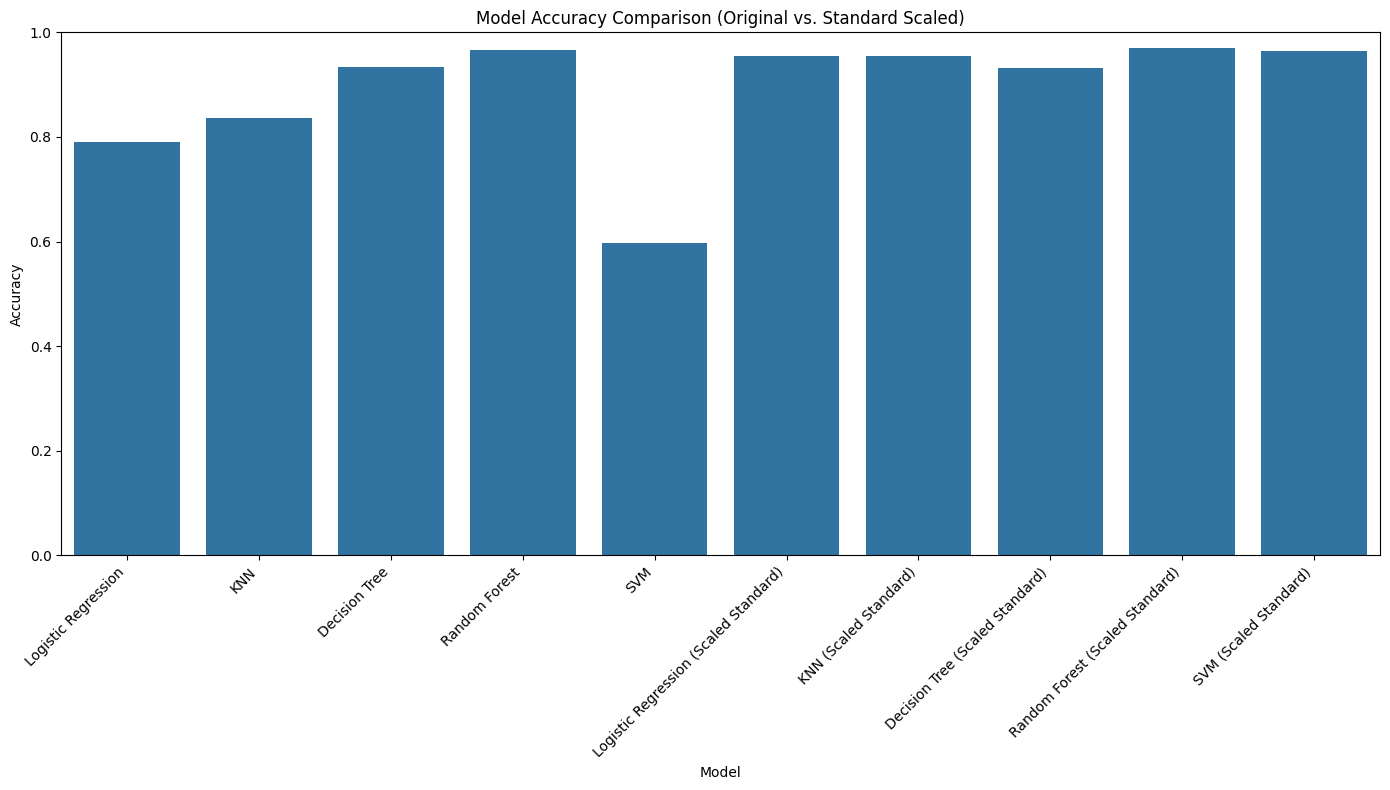

In [ ]:
# Evaluate accuracy of scaled models
accuracy_lr_scaled_standard = accuracy_score(y_test, y_pred_lr_scaled_standard)
accuracy_knn_scaled_standard = accuracy_score(y_test, y_pred_knn_scaled_standard)
accuracy_dt_scaled_standard = accuracy_score(y_test, y_pred_dt_scaled_standard)
accuracy_rf_scaled_standard = accuracy_score(y_test, y_pred_rf_scaled_standard)
accuracy_svm_scaled_standard = accuracy_score(y_test, y_pred_svm_scaled_standard)


# Create a DataFrame with the scaled results
results_scaled_standard = pd.DataFrame({
    'Model': ['Logistic Regression (Scaled Standard)', 'KNN (Scaled Standard)', 'Decision Tree (Scaled Standard)', 'Random Forest (Scaled Standard)', 'SVM (Scaled Standard)'],
    'Accuracy': [accuracy_lr_scaled_standard, accuracy_knn_scaled_standard, accuracy_dt_scaled_standard, accuracy_rf_scaled_standard, accuracy_svm_scaled_standard]
})

# Concatenate original and scaled results for plotting
combined_results = pd.concat([results, results_scaled_standard], ignore_index=True)


# Plot the combined results
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', data=combined_results)
plt.title('Model Accuracy Comparison (Original vs. Standard Scaled)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for accuracy
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM model...
Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8218 - loss: 0.4499 - val_accuracy: 0.9448 - val_loss: 0.1530
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9434 - loss: 0.1490 - val_accuracy: 0.9475 - val_loss: 0.1380
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - loss: 0.1500 - val_accuracy: 0.9535 - val_loss: 0.1311
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9569 - loss: 0.1204 - val_accuracy: 0.9519 - val_loss: 0.1335
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1177 - val_accuracy: 0.9535 - val_loss: 0.1269
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9615 - loss: 0.1147 - val_accuracy: 0.9552 - val_loss: 0.1267
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9637 - loss: 0.1011 - val_accuracy: 0.9574 - val_loss: 0.1260
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9649 - loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8660 - loss: 0.3948 - val_accuracy: 0.9497 - val_loss: 0.1436
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9462 - loss: 0.1430 - val_accuracy: 0.9502 - val_loss: 0.1348
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9521 - loss: 0.1272 - val_accuracy: 0.9513 - val_loss: 0.1288
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9488 - loss: 0.1286 - val_accuracy: 0.9535 - val_loss: 0.1263
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9588 - loss: 0.1124 - val_accuracy: 0.9513 - val_loss: 0.1299
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9594 - loss: 0.1031 - val_accuracy: 0.9574 - val_loss: 0.1259
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9670 - loss: 0.0936 - val_accuracy: 0.9546 - val_loss: 0.1286
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9692 - loss: 0.0847 - val_accuracy: 0

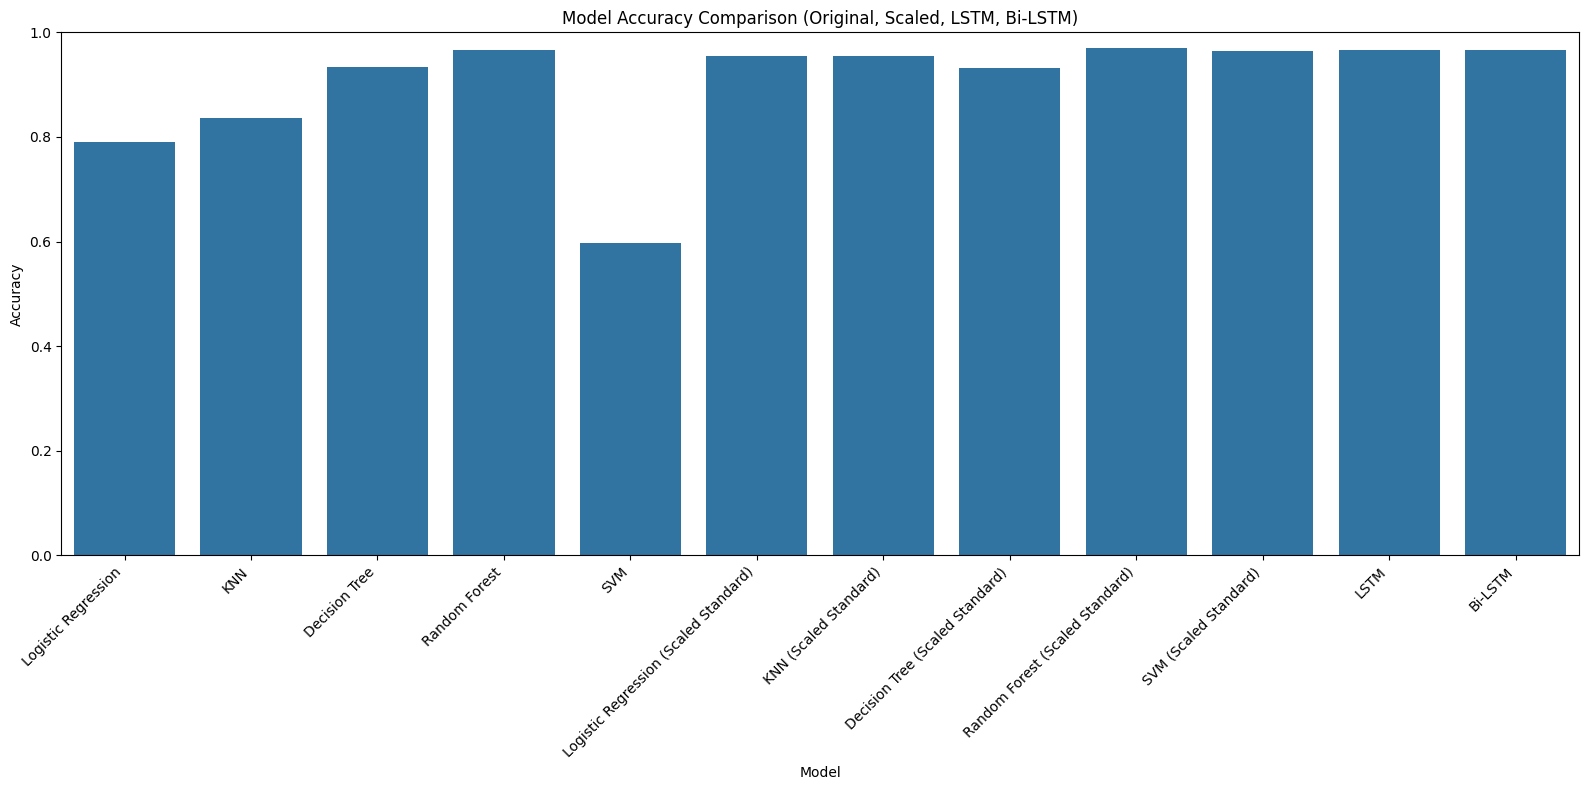

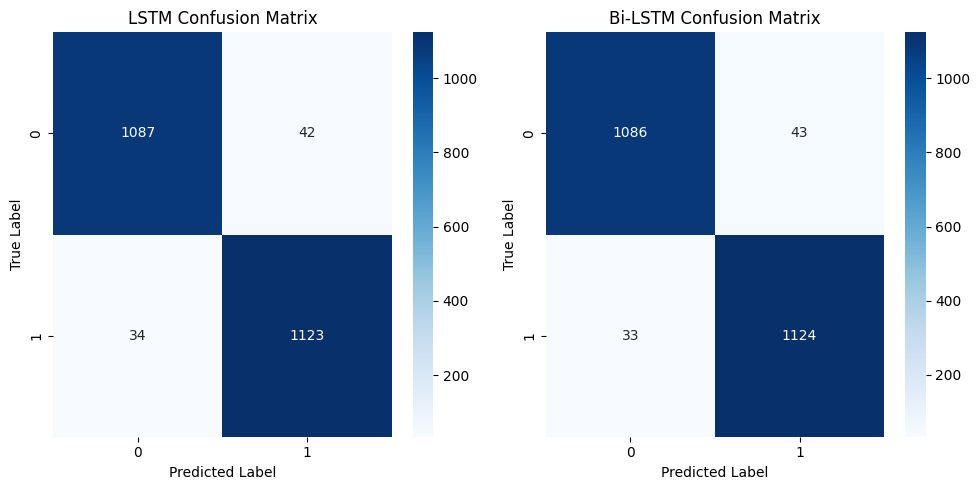

In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM (samples, timesteps, features)
# For tabular data, we can treat each feature as a timestep or use a timestep of 1
X_train_reshaped = X_train_scaled_standard.values.reshape((X_train_scaled_standard.shape[0], 1, X_train_scaled_standard.shape[1]))
X_test_reshaped = X_test_scaled_standard.values.reshape((X_test_scaled_standard.shape[0], 1, X_test_scaled_standard.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1, activation='sigmoid')) # Sigmoid for binary classification

# Compile the LSTM model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
print("\nTraining LSTM model...")
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"\nLSTM Test Accuracy: {accuracy_lstm}")

# Predict with LSTM
y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

# Define the Bidirectional LSTM (Bi-LSTM) model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(units=50)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(units=1, activation='sigmoid')) # Sigmoid for binary classification

# Compile the Bi-LSTM model
bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
print("\nTraining Bi-LSTM model...")
history_bilstm = bilstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the Bi-LSTM model
loss_bilstm, accuracy_bilstm = bilstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"\nBi-LSTM Test Accuracy: {accuracy_bilstm}")

# Predict with Bi-LSTM
y_pred_bilstm = (bilstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
print("\nBi-LSTM Classification Report:")
print(classification_report(y_test, y_pred_bilstm))

# Confusion matrices for LSTM and Bi-LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)

# Add LSTM and Bi-LSTM results to the combined results DataFrame
lstm_results = pd.DataFrame({'Model': ['LSTM'], 'Accuracy': [accuracy_lstm]})
bilstm_results = pd.DataFrame({'Model': ['Bi-LSTM'], 'Accuracy': [accuracy_bilstm]})
combined_results_dl = pd.concat([combined_results, lstm_results, bilstm_results], ignore_index=True)

# Plot the combined results including DL models
plt.figure(figsize=(16, 8))
sns.barplot(x='Model', y='Accuracy', data=combined_results_dl)
plt.title('Model Accuracy Comparison (Original, Scaled, LSTM, Bi-LSTM)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrices for LSTM and Bi-LSTM
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('LSTM Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Bi-LSTM Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


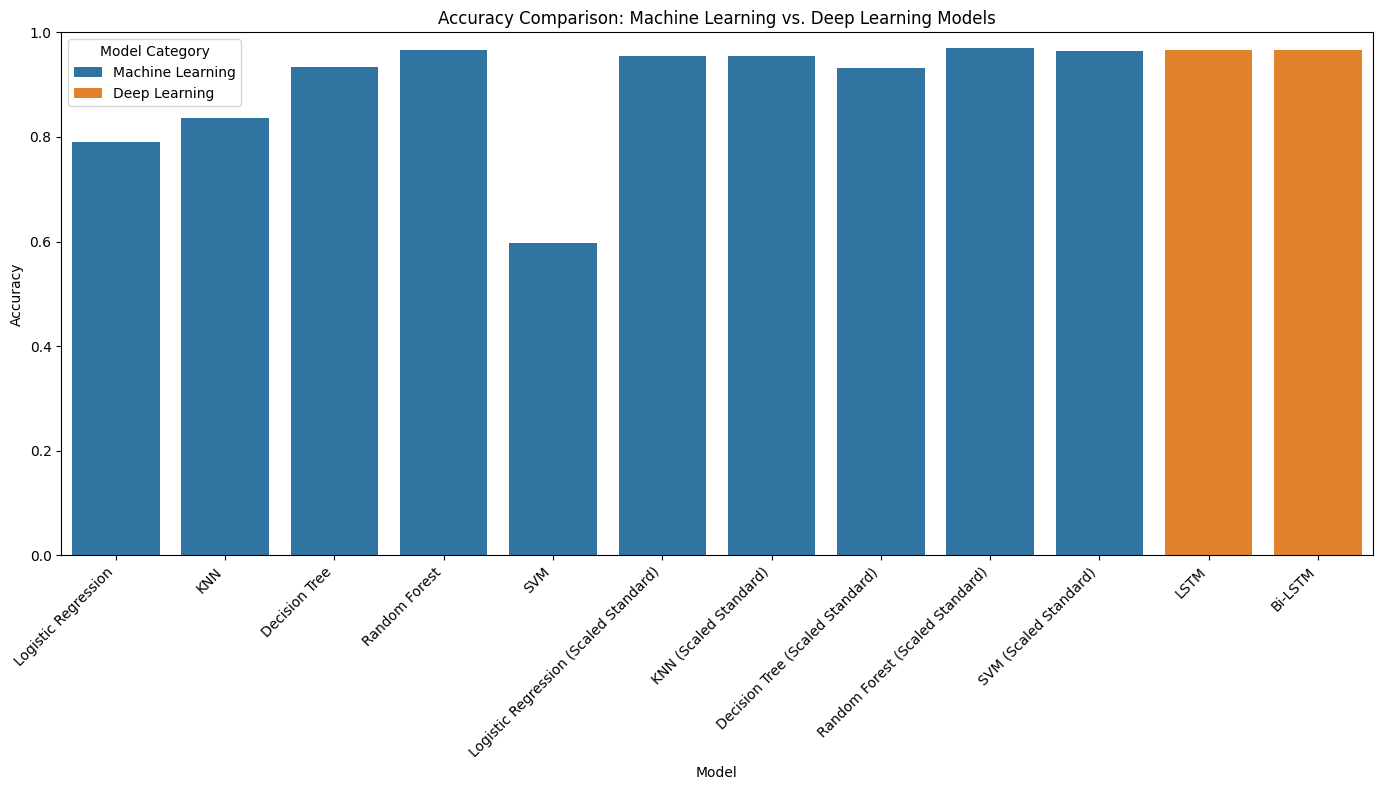

In [ ]:
# Extract machine learning and deep learning results
ml_results = combined_results_dl[combined_results_dl['Model'].isin(['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression (Scaled Standard)', 'KNN (Scaled Standard)', 'Decision Tree (Scaled Standard)', 'Random Forest (Scaled Standard)', 'SVM (Scaled Standard)'])]
dl_results = combined_results_dl[combined_results_dl['Model'].isin(['LSTM', 'Bi-LSTM'])]

# Create a combined DataFrame for comparison
compare_results = pd.concat([ml_results, dl_results], ignore_index=True)
compare_results['Category'] = compare_results['Model'].apply(lambda x: 'Deep Learning' if 'LSTM' in x else 'Machine Learning')

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', hue='Category', data=compare_results)
plt.title('Accuracy Comparison: Machine Learning vs. Deep Learning Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Category')
plt.tight_layout()
plt.show()